In [3]:
# statsbomb 15-16
# https://www.statsperform.com/resource/how-we-measure-pressure/
# 15z20
# chelse:23.7
# arsenal:23.84
# westham:23.93
# everton:23.97
# crystal:24.0
# stoke:24.15
# sunder:24.34
# manutd:24.42
# astonvilla:24.45
# swensea:24.79
# norwich:24.97
# watford:25.3
# bmouth:25.45
# leicester:25.5
# tott:25.8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

teams = pd.read_csv("teams5sb.csv", index_col=[0,1])
teams.columns=[x.lower() for x in teams.columns]

In [5]:
df_width= pd.read_csv(r'C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\abswidth2223.csv')
df_width=df_width[['1','y']]

In [13]:
teamsw=teams.loc[2223]
teamsw

,players_used,mp,starts,min,90s,ga,ga90,sota,saves,save%,...,opp_carries,opp_totdist,opp_prgdist,opp_prgc,opp_1/3,opp_cpa,opp_mis,opp_dis,opp_rec,opp_prgr
Arsenal,1,38,38,3420,38,43,1.13,136,94,70.6,...,10261,53986,26086,510,354,147,476,319,11310,901
Aston Villa,2,38,38,3420,38,46,1.21,151,108,72.8,...,12332,62377,31979,607,425,184,486,320,14144,1306
Bournemouth,2,38,38,3420,38,71,1.87,204,136,68.1,...,16186,82870,42849,810,575,211,550,362,18578,1976
Brentford,1,38,38,3420,38,46,1.21,197,154,77.7,...,13624,72302,37380,741,656,155,547,334,15840,1530
Brighton,2,38,38,3420,38,53,1.39,131,82,64.1,...,10293,53237,26095,527,367,173,513,350,11532,1012
Chelsea,2,38,38,3420,38,47,1.24,159,115,71.1,...,11149,58694,30130,593,416,167,545,407,12479,1188
Crystal Palace,3,38,38,3420,38,49,1.29,160,114,71.9,...,14512,74733,38926,590,485,139,584,409,16193,1581
Everton,2,38,38,3420,38,57,1.50,185,127,71.9,...,14664,76078,40728,752,496,212,582,399,16932,1670
Fulham,2,38,38,3420,38,53,1.39,196,144,76.5,...,13029,65866,32970,558,353,165,543,324,14833,1390
Leeds United,2,38,38,3420,38,78,2.05,185,108,60.5,...,13328,67350,33950,596,423,189,630,428,14978,1455


In [21]:
s1=set(teamsw.index)
s2=set(df_width['1'])
mapping=dict(zip(sorted(s2),sorted(s1)))
df_width['1']=df_width['1'].map(mapping)
df_width=df_width.set_index('1')

In [27]:
teamsw=teamsw.join(df_width)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as MSE



In [7]:
# Create train/test split for initial holdout


def reg_prep(dfnr,to_pred_cols_lst):
    # Create arrays for features and target variable
    df_to_pred= dfnr[to_pred_cols_lst]
    y = df_to_pred.values
    df_wo_y = dfnr.drop(to_pred_cols_lst,axis='columns')
    X = df_wo_y.values

    y_labels=df_to_pred.columns
    x_labels=df_wo_y.columns
    return X, y, x_labels,y_labels


def reg_prep_split(X, y,test_size=0.3):
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=42)
    return X_train, X_test, y_train, y_test

def categorical_prep(df1,col):
# if CATEGORICAL data
# Create dummy variables: 
    df2=df1.join(pd.get_dummies(df1[col]))
    df2.drop([col],axis='columns', inplace=True)
    return df2

def categorical_code(pds):
    return pds.astype("category").cat.codes
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

def importants(labels,coefs):
    df1=pd.DataFrame()
    df1['a']=labels
    df1['b']=coefs
    df1=df1.sort_values('b',key=lambda x:-abs(x))[df1.b.abs()>0.0]
    return(df1)


def reg_prep_scaled(dfnr,to_pred_cols_lst):
    # Create arrays for features and target variable
    df_to_pred= dfnr[to_pred_cols_lst]
    df_wo_y = dfnr.drop(to_pred_cols_lst,axis='columns')

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X = scaler_x.fit_transform(df_wo_y)
    y = scaler_y.fit_transform(df_to_pred)

    y_labels=df_to_pred.columns
    x_labels=df_wo_y.columns
    return X, y, x_labels,y_labels,scaler_x,scaler_y

In [122]:
# bramkarz-obrona-pomoc-atak-trener
# (PSxG-GA)/SoT; opp_xG; xG; Gls/xG
# ; SoTA; SCA; ;
bramkarz=['psxg','ga','sot']
obrona=['opp_xg','sota']
pomoc=['xg','sca']
atak=['gls','xg']
trener=['opp_xg'] #'opp_xg' vs AVGopp_xg

taktyka =['dist','cpa','1/3']# Dist(shot) C1/3 CPA
offence=['def pen','def 3rd','mid 3rd','att 3rd','att pen','touches'] #Touches[Def3rd Mid3rd Att3rd]/Touches
intensity=['touches']
wide=['sw','crs','att','opp_ti','xa'] #/Poss Sw Crs Take-Ons[Att]'opp_ti' xA/PPA
speed=['poss','prgdist'] #PrgP/Poss poss/prgdist
stalefragmenty =['dead','fk','ti','ck', 'gca passdead'] #/Poss Dead,FK,TI,CK GCA pass dead
press=['sca def','tackles def 3rd', 'tackles mid 3rd', 'tackles att 3rd','tackles tkl','fls','won','opp_rec','opp_total cmp','opp_total att','recov']
# SCA_Def,Tackles[Def3rd Mid3rd Att3rd], *oppRec, Fls AWon 
where=['tackles def 3rd','tackles mid 3rd','tackles att 3rd','def 3rd','mid 3rd','att 3rd','att pen','def pen']
error=['challenges lost','tackles tklw','tackles tkl','err','mis','dis','crdy','og','lost']
# ChallengesLost TklW/TklAtt Err Mis Dis CrdY OG Alost
succ=['int','tackles tklw','succ','challenges tkl','blocks','opp_total att','recov'] #Int TklW ChaTkl Take-Ons[Att] blocks 'opp_total att'
pas=['total att','short att','medium att','long att','crspa']
subset=bramkarz+obrona+pomoc+atak+trener+taktyka+offence+intensity+wide+speed+stalefragmenty+press+error+where+pas
subset=list(set(subset))
len(subset)
df=teamsw[subset+['y']]


In [144]:
# ENGnew
df['sw_p']=df['sw']/df['poss']
df['crs_p']=df['crs']/df['poss']
df['att_p']=df['att']/df['poss']
df['opp_ti_p']=df['opp_ti']/(1-df['poss'])


C:\Users\krawc\AppData\Local\Temp\ipykernel_11900\2591710235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sw_p']=df['sw']/df['poss']
C:\Users\krawc\AppData\Local\Temp\ipykernel_11900\2591710235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crs_p']=df['crs']/df['poss']
C:\Users\krawc\AppData\Local\Temp\ipykernel_11900\2591710235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [145]:
possible=['sw','crs','att','opp_ti','ti','ck','xa','y']
possible2=['crs','opp_ti','ti','total att','short att','y']
possible3=['sw','crs','att','opp_ti','ti','ck','xa','y','total att','short att','medium att','long att','crspa']
possible4=['sw_p','crs_p','att_p','opp_ti_p','y']

dfsel=df[possible4]
dfsel=dfsel.reset_index(drop=True)
# dfsel=dfsel.iloc[2:]

In [146]:
# X,y,cols,labels_y =reg_prep(dfsel,['xg'])
X,y,cols,labels_y,scaler_x,scaler_y =reg_prep_scaled(dfsel,['y'])

X_train, X_test, y_train, y_test,= reg_prep_split(X,y)

[[ 0.6956033  -0.27228511 -0.38927776 -0.71607726]]


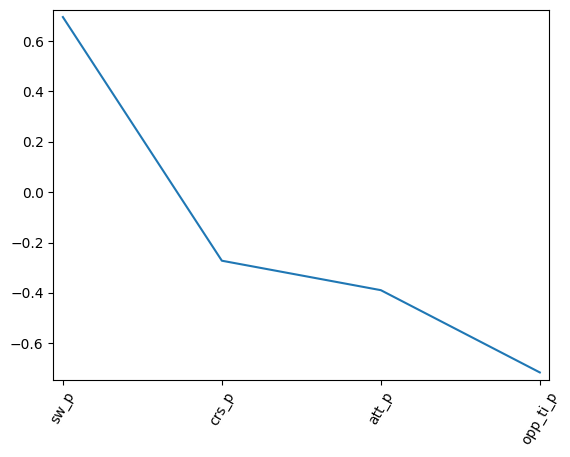

[  -4.40305434 -337.84792087  -13.30355802   -1.74685251  -10.18672793]
-73.49762273489948
R^2 on holdout
-1.1875730037729828
RMSE:0.5227083711686954


In [147]:
# LinearRegression

# Import necessary modules
from sklearn.linear_model import LinearRegression

# Create the regressor: reg_all
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print the coefficients
print(reg.coef_)

# Plot the coefficients
plt.plot(range(len(cols)), reg.coef_[0])
plt.xticks(range(len(cols)), cols, rotation=60)
plt.margins(0.02)
plt.show()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)
print(np.mean(cv_scores))


# Compute and print R^2 on holdout
print('R^2 on holdout')
print(reg.score(X_test, y_test))

# Compute mse_lr
mse_lr = MSE(y_test, y_pred)
# Compute rmse_lr
rmse_lr = mse_lr**(1/2)
print(f'RMSE:{rmse_lr}')

In [140]:
importants(cols,reg.coef_[0])
# no scale
# 2	att 3rd	0.006173
# 1	mid 3rd	0.001188
# 0	def 3rd	-0.000412
# scale
# 2	att 3rd	0.590432
# 1	mid 3rd	0.188751
# 0	def 3rd	-0.023535

# eng1
# 2	att 3rd	0.573079
# 1	mid 3rd	0.255668
# 0	def 3rd	-0.042576
# eng1 dma/touches
# 0	engd	-9.925295
# 1	engm	-5.540172
# 2	enga	-4.507462
# eng1 dma/touches *poss
# 2	enga	0.530065
# 1	engm	0.320599
# 0	engd	-0.064945

C:\Users\krawc\AppData\Local\Temp\ipykernel_11900\1905698317.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df1.sort_values('b',key=lambda x:-abs(x))[df1.b.abs()>0.0]


,a,b
4,short att,-1.924248
3,total att,1.421473
2,ti,0.877107
1,opp_ti,-0.855490
0,crs,-0.110299


In [148]:
# xx=teams[possible1].values
ybase=list(labels_y)[0]
xx=X
# teams[ybase+'_pred']=reg.predict(xx)
# teams[ybase+'_calc']=-0.042576*teams['def 3rd']+0.255668*teams['mid 3rd']+0.573079*teams['att 3rd']
dfsel[ybase+'_pred']=scaler_y.inverse_transform(reg.predict(xx))
data = dfsel[[ybase,ybase+'_pred']].reset_index(drop=1)
data


,y,y_pred
0,17.776364,15.732661
1,17.833127,16.421873
2,15.987104,16.174152
3,16.113906,16.562590
4,16.139954,16.066100
5,16.920954,16.108803
6,17.918518,16.415271
7,15.627668,16.417210
8,17.947924,17.092142
9,16.262286,16.328597


<Axes: >

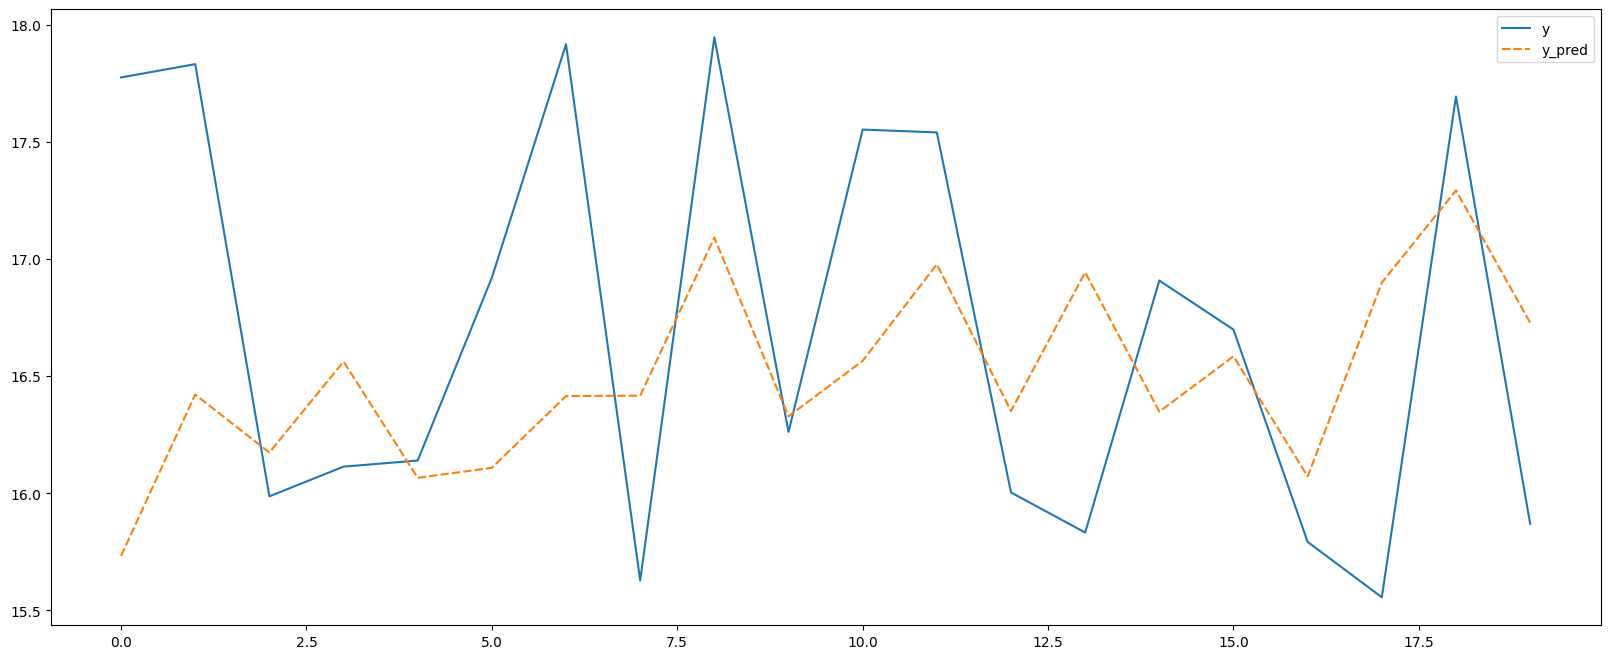

In [149]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=data,estimator=None)

<Axes: >

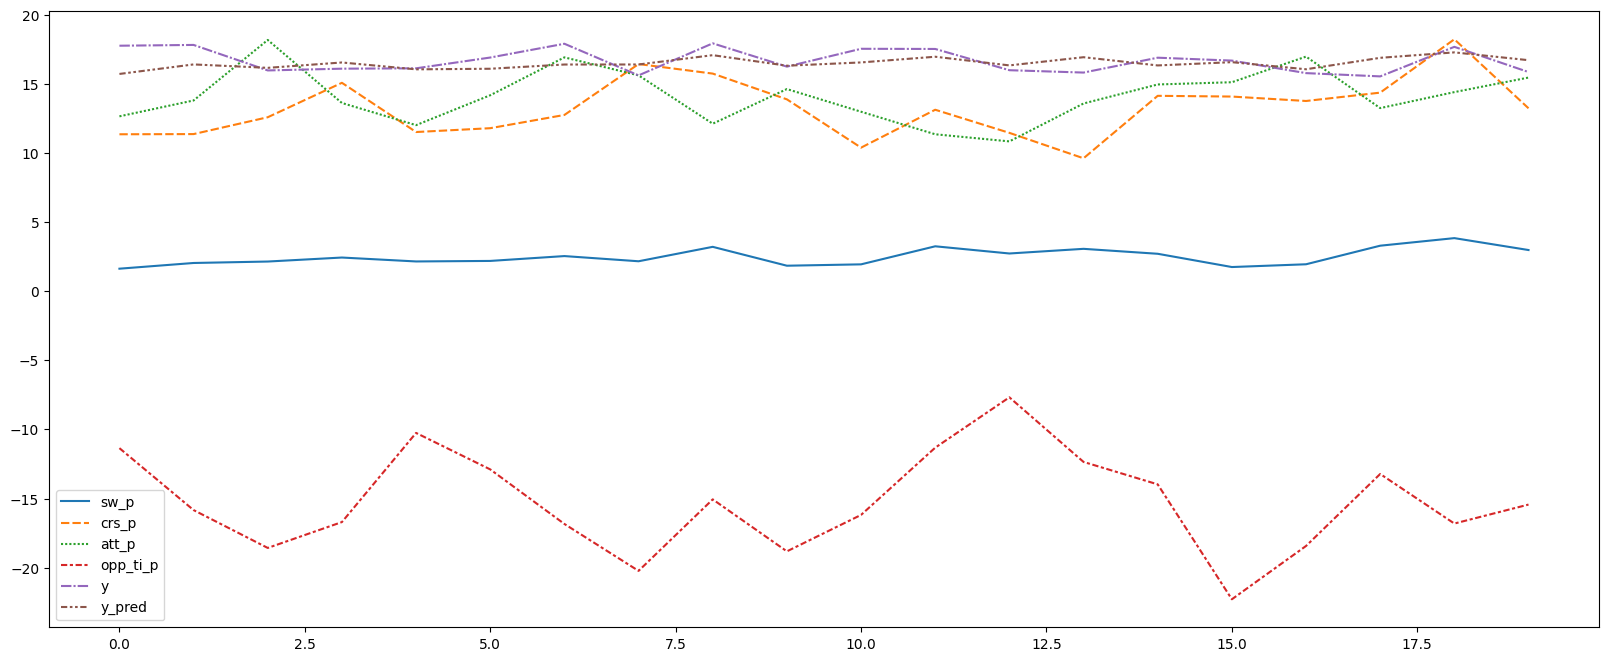

In [151]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfsel,estimator=None)

<Axes: >

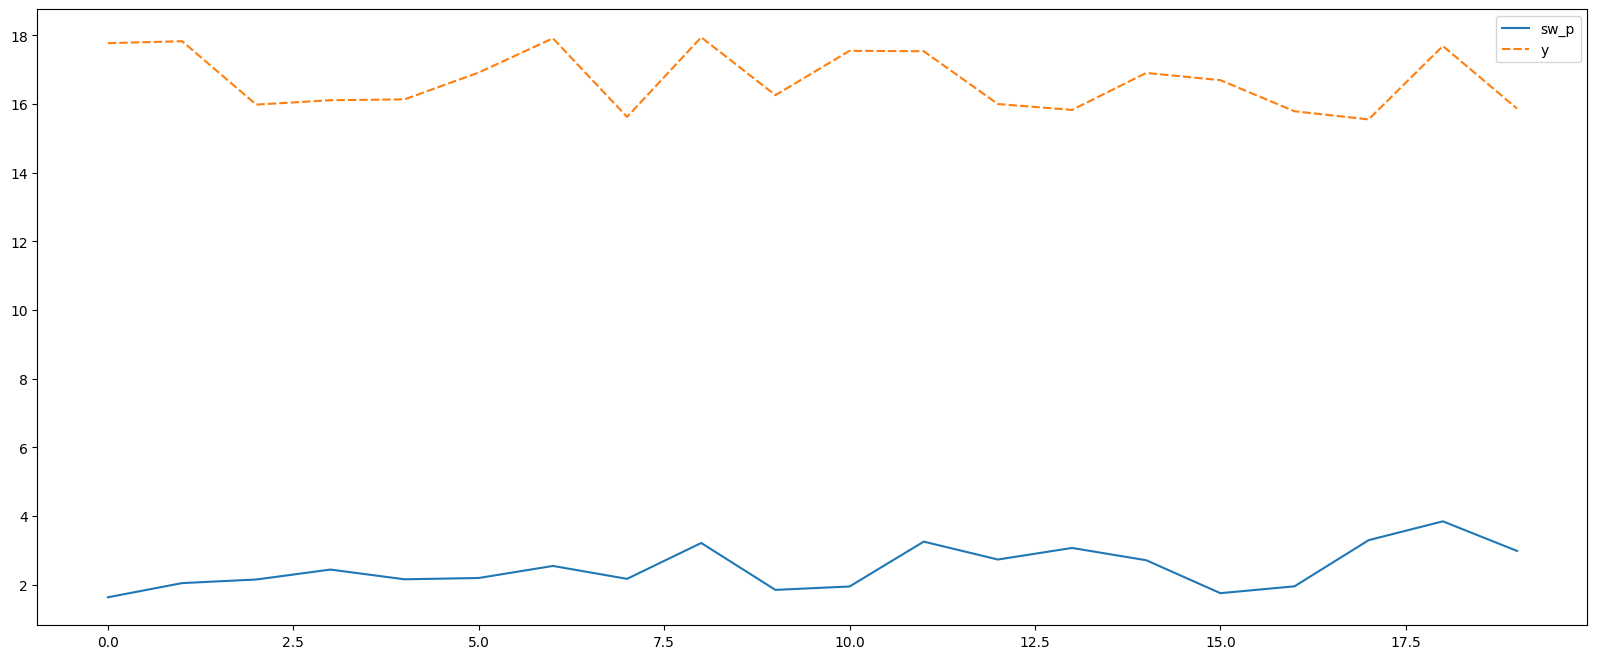

In [154]:

data = df[['sw_p','y']].reset_index(drop=1)
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=data,estimator=None)